## Import Libraries

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import *

## Load the dataset

In [45]:
# Load testing data
data = pd.read_csv('https://raw.githubusercontent.com/ktxdev/mind-matters/refs/heads/master/data/raw/train.csv')

## Initial Exploration
### Shape and Structure

In [46]:
print(data.shape)
data.head()

(140700, 20)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


### Dropping Unwanted Features
- **id:** This is just a unique identifier for each person in the dataset, which does not contribute to predicting mental health outcomes.
- **Name:** This feature is not relevant to predicting depression and could introduce noise i.e it does not provide meaningful information for the model

In [47]:
data.drop(columns=['id', 'Name'], inplace=True)

### Rename Columns

In [48]:
data.rename(columns={'Have you ever had suicidal thoughts ?': 'Had Suicidal Thoughts?'}, inplace=True)

### Data Types

In [49]:
data.dtypes

Gender                               object
Age                                 float64
City                                 object
Working Professional or Student      object
Profession                           object
Academic Pressure                   float64
Work Pressure                       float64
CGPA                                float64
Study Satisfaction                  float64
Job Satisfaction                    float64
Sleep Duration                       object
Dietary Habits                       object
Degree                               object
Had Suicidal Thoughts?               object
Work/Study Hours                    float64
Financial Stress                    float64
Family History of Mental Illness     object
Depression                            int64
dtype: object

### Data Types Conversion

In [50]:
data['Depression'] = data['Depression'].map({0: 'Not Depressed', 1: 'Depressed'})

## Univariate Analysis

### Age

#### Check missing values

In [11]:
check_missing_values(data, 'Age')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [12]:
data['Age'].describe()

count    140700.000000
mean         40.388621
std          12.384099
min          18.000000
25%          29.000000
50%          42.000000
75%          51.000000
max          60.000000
Name: Age, dtype: float64

#### Visualization

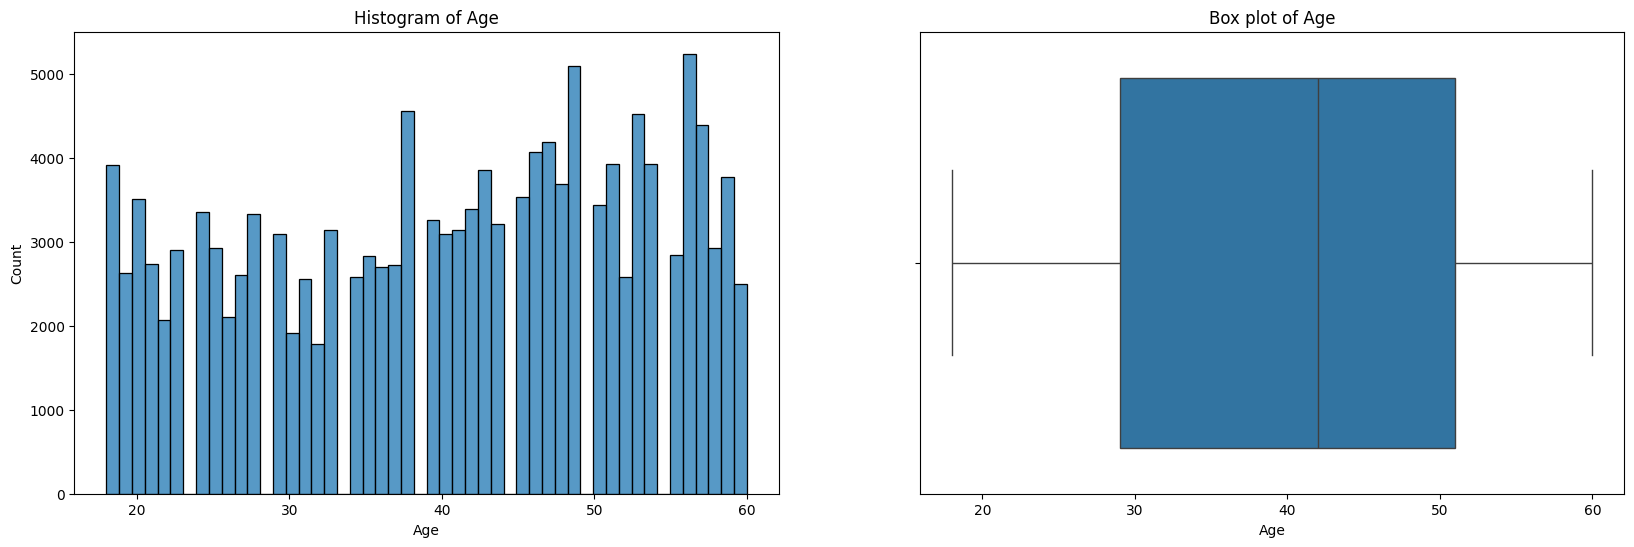

In [14]:
plot_numerical(data, 'Age')

#### Insights
- The dataset represents a balanced age range, from younger adults (18 years) to older adults (60 years)
- The uniform histogram suggests that no particular age group dominates, though middle-aged individuals are slightly more represented

#### CGPA

#### Check missing values

In [15]:
check_missing_values(data, 'CGPA')

Missing values count: 112802
Missing values percentage: 80.17%


#### Descriptive Statistics

In [16]:
data['CGPA'].describe()

count    27898.000000
mean         7.658636
std          1.464466
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64

#### Visualizations

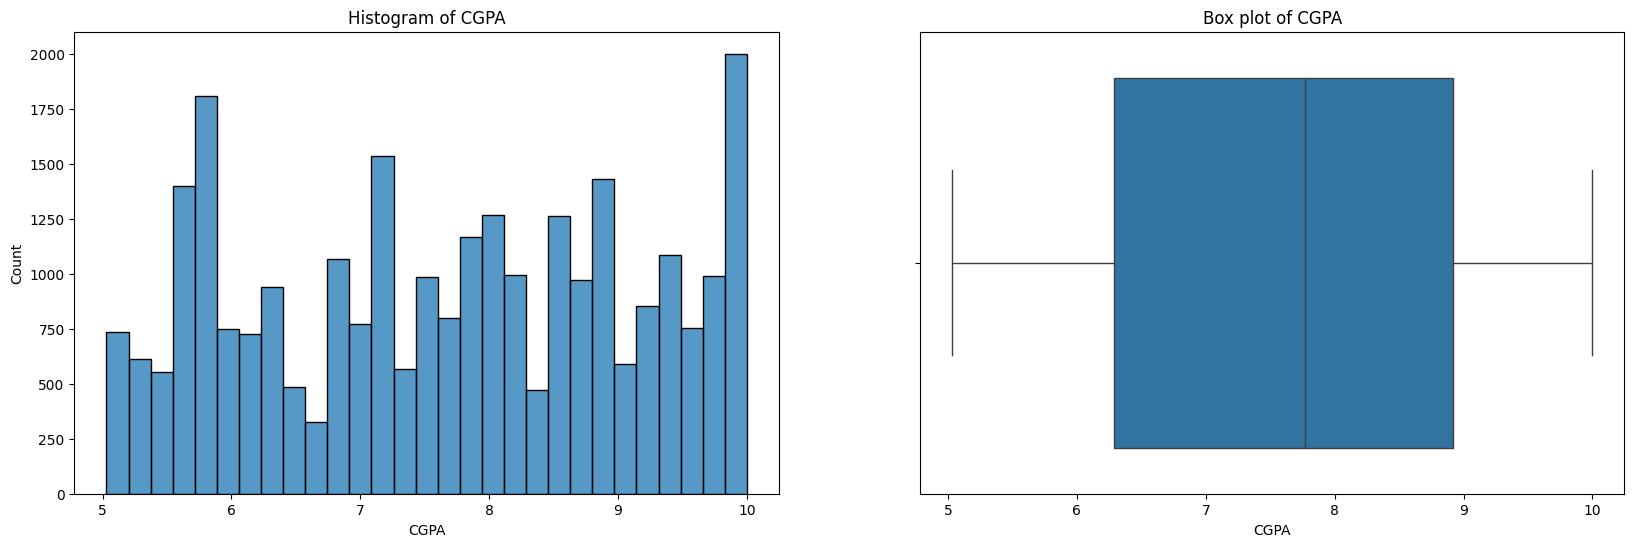

In [12]:
plot_numerical(data, 'CGPA')

**Insights:**
- The high percentage of missing values (80%) is due to the dataset composition, as most of the individuals are working professionals who likely do not have CGPA data
- For the 20% of students, the CGPA distribution indicates strong academic performance, with most students achieving CGPAs in the range of 7–9
- The right-skewed distribution suggests that a significant portion of students perform exceptionally well (CGPA > 8), while only a few fall at the lower end of the scale (CGPA < 6)

### Academic Pressure

#### Check missing values

In [21]:
check_missing_values(data, 'Academic Pressure')

Missing values count: 112803
Missing values percentage: 80.17%


#### Descriptive Statistics

In [22]:
data['Academic Pressure'].describe()

count    27897.000000
mean         3.142273
std          1.380457
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Academic Pressure, dtype: float64

#### Visualizations

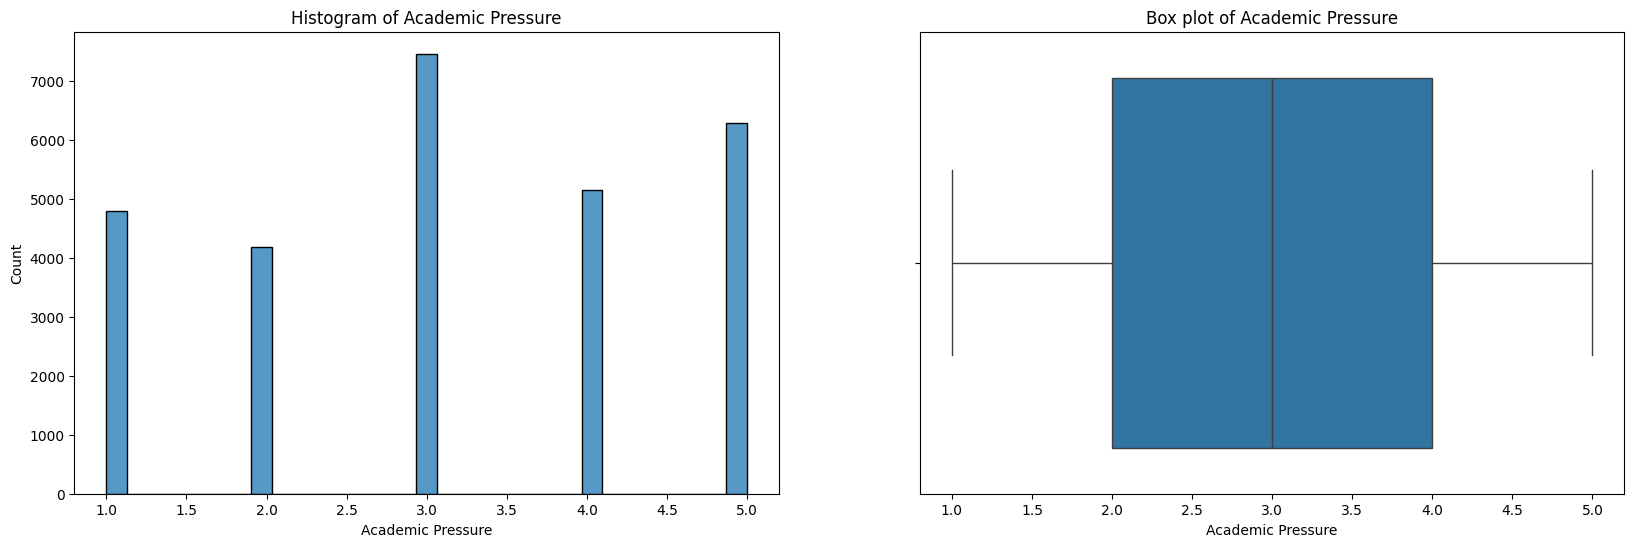

In [23]:
plot_numerical(data, 'Academic Pressure')

**Insights:**
- The missing values are expected and align with the working professionals not being part of the academic system
- The average academic pressure (3.14) indicates that most students report moderate levels of academic pressure
- A group perceives low pressure, possibly due to good academic preparedness or coping mechanisms
- A significant group reports high pressure, which may be linked to heavy workloads, external stressors, or personal struggles

### Work Pressure

#### Check missing values

In [24]:
check_missing_values(data, 'Work Pressure')

Missing values count: 27918
Missing values percentage: 19.84%


#### Descriptive Statistics

In [25]:
data['Work Pressure'].describe()

count    112782.000000
mean          2.998998
std           1.405771
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Work Pressure, dtype: float64

#### Visualizations

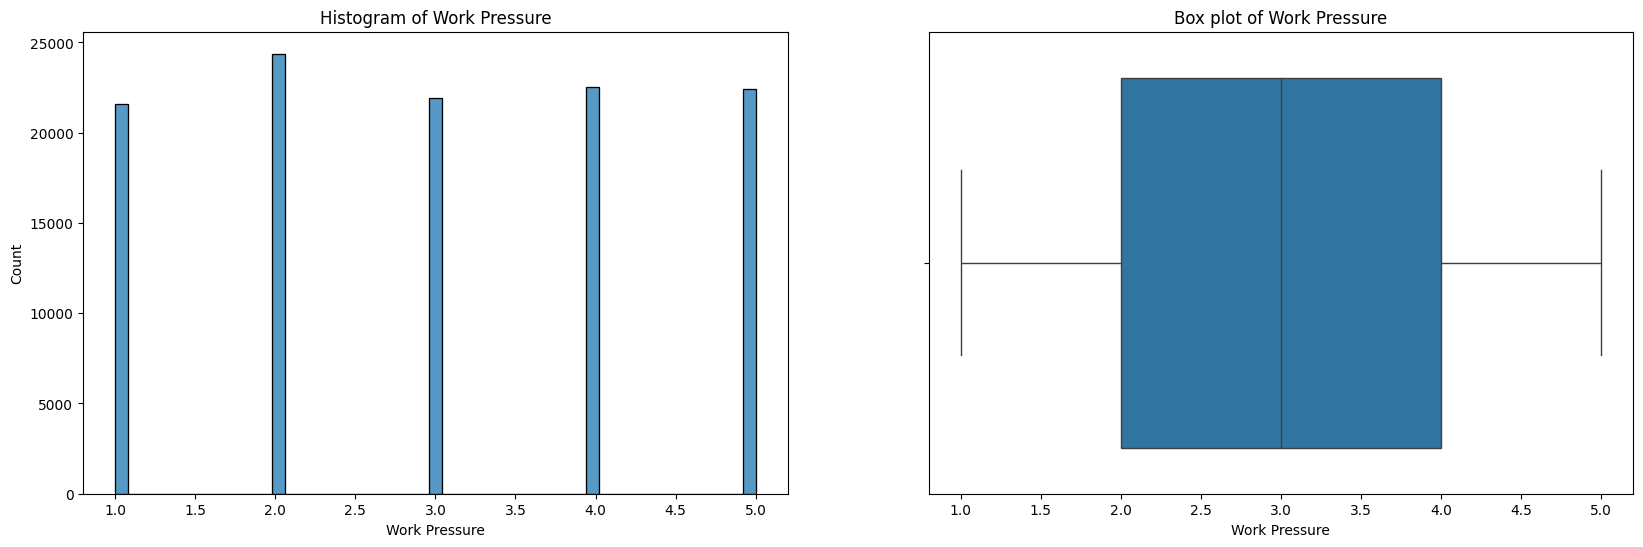

In [26]:
plot_numerical(data, 'Work Pressure')

#### Insights:
- The missing values correspond to the student population, as they do not experience work pressure
- The average work pressure is moderate (2.99) with no extreme concentrations, but a uniform distribution suggests that work pressure affects individuals differently, possibly depending on their roles, industries, or workloads
- Factors influencing high work pressure (e.g., job satisfaction, mental health, or work-life balance)

### Study Satisfaction

#### Check missing values

In [27]:
check_missing_values(data, 'Study Satisfaction')

Missing values count: 112803
Missing values percentage: 80.17%


#### Descriptive Statistics

In [28]:
data['Study Satisfaction'].describe()

count    27897.000000
mean         2.944940
std          1.360197
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Study Satisfaction, dtype: float64

#### Visualizations

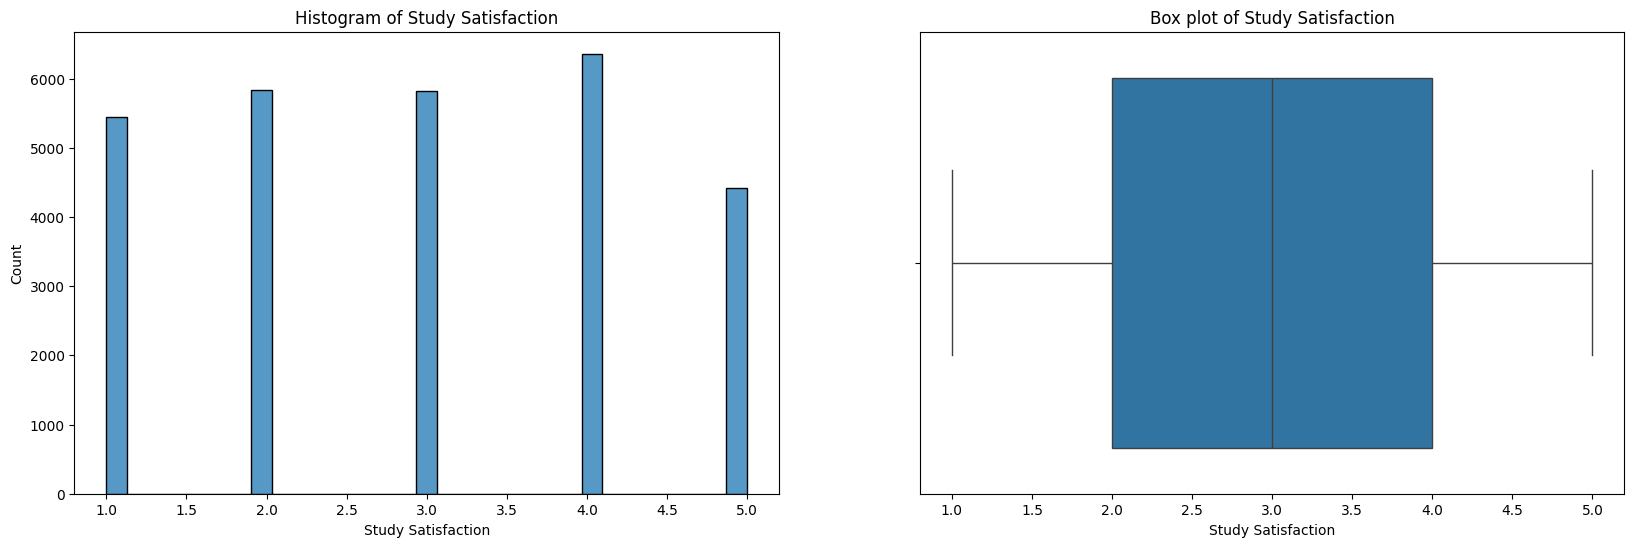

In [29]:
plot_numerical(data, 'Study Satisfaction')

#### Insights:
- The missing values are expected and align with the working professionals not being part of the student group
- The average study satisfaction is moderate (2.94), with no extreme clustering around any particular value. This suggests that students have a balanced mix of positive and negative experiences regarding their studies
- Possible external factors, such as academic pressure, CGPA, or institutional support, influencing satisfaction.

### Job Satisfaction

#### Check missing values

In [30]:
check_missing_values(data, 'Job Satisfaction')

Missing values count: 27910
Missing values percentage: 19.84%


#### Descriptive Statistics

In [31]:
data['Job Satisfaction'].describe()

count    112790.000000
mean          2.974404
std           1.416078
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Job Satisfaction, dtype: float64

#### Visualizations

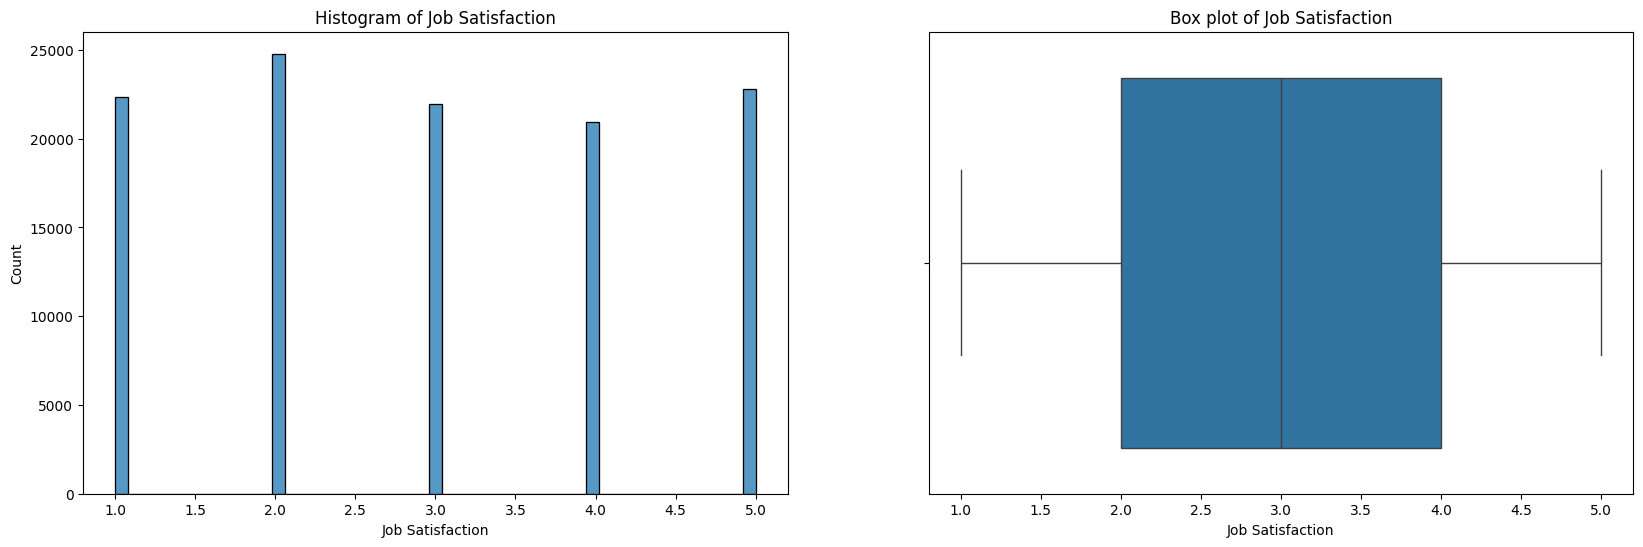

In [33]:
plot_numerical(data, 'Job Satisfaction')

#### Insights:
- The missing values align with the student population, as they are not included in job satisfaction reporting
- The average job satisfaction (2.97) indicates a generally moderate level, with equal representation across satisfaction levels suggesting diverse experiences in the workplace
- The uniform distribution may indicate that job satisfaction is influenced by a range of external factors, such as: Work pressure, job role, or work-life balance as well as demographics such as age, gender, or years of experience

### Work/Study Hours

#### Check missing values

In [34]:
check_missing_values(data, 'Work/Study Hours')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [35]:
data['Work/Study Hours'].describe()

count    140700.000000
mean          6.252679
std           3.853615
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          12.000000
Name: Work/Study Hours, dtype: float64

#### Visualizations

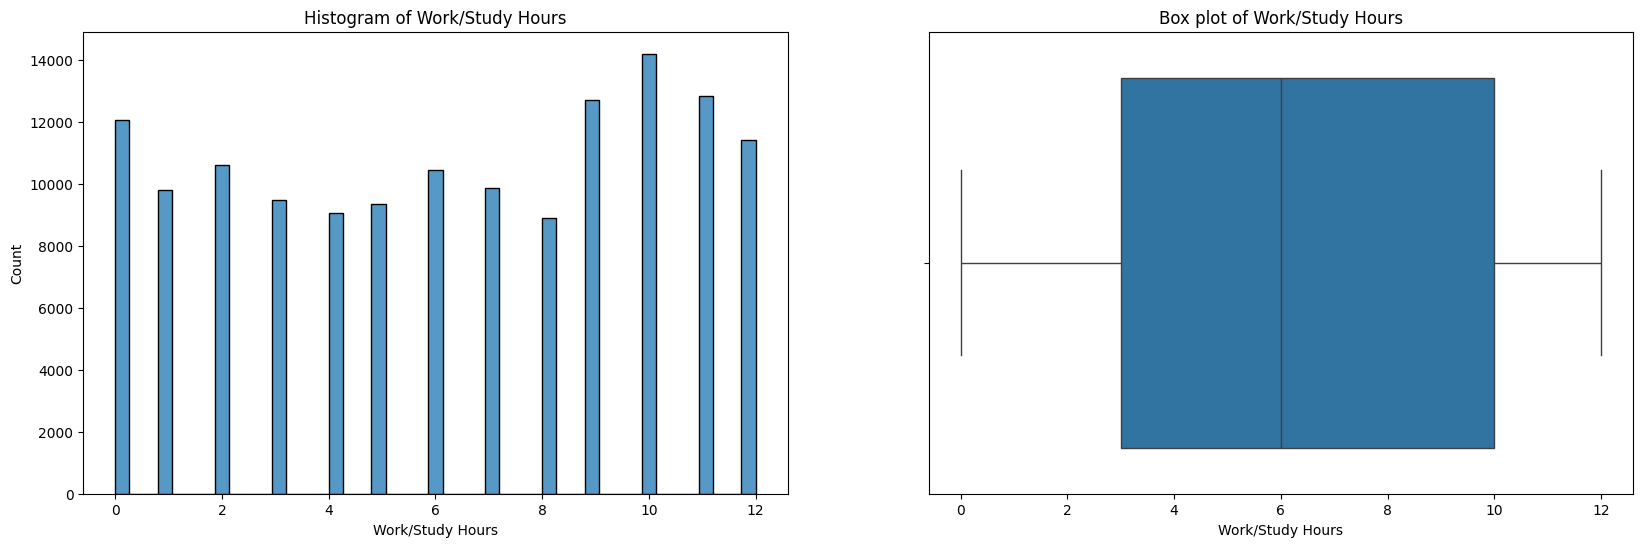

In [36]:
plot_numerical(data, 'Work/Study Hours')

#### Insights:
- The range of hours (0–12) and high standard deviation indicate significant differences in daily commitments across the dataset. Some individuals spend little to no time, while others engage for very long hours
- The mean and median values (~6 hours/day) suggest that, on average, individuals dedicate a reasonable amount of time to work or study
- The uniform histogram indicates diversity in engagement patterns, likely reflecting differences between working professionals and students
#### Possible Interpretation:
- Students might be more concentrated around high study hours (e.g., 8–10), while professionals may have a broader distribution based on job flexibility
- Low hours (0–3) might correspond to unemployed individuals or students on academic breaks

### Financial Stress

#### Check missing values

In [37]:
check_missing_values(data, 'Financial Stress')

Missing values count: 4
Missing values percentage: 0.0%


#### Descriptive Statistics

In [38]:
data['Financial Stress'].describe()

count    140696.000000
mean          2.988983
std           1.413633
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Financial Stress, dtype: float64

#### Visualizations

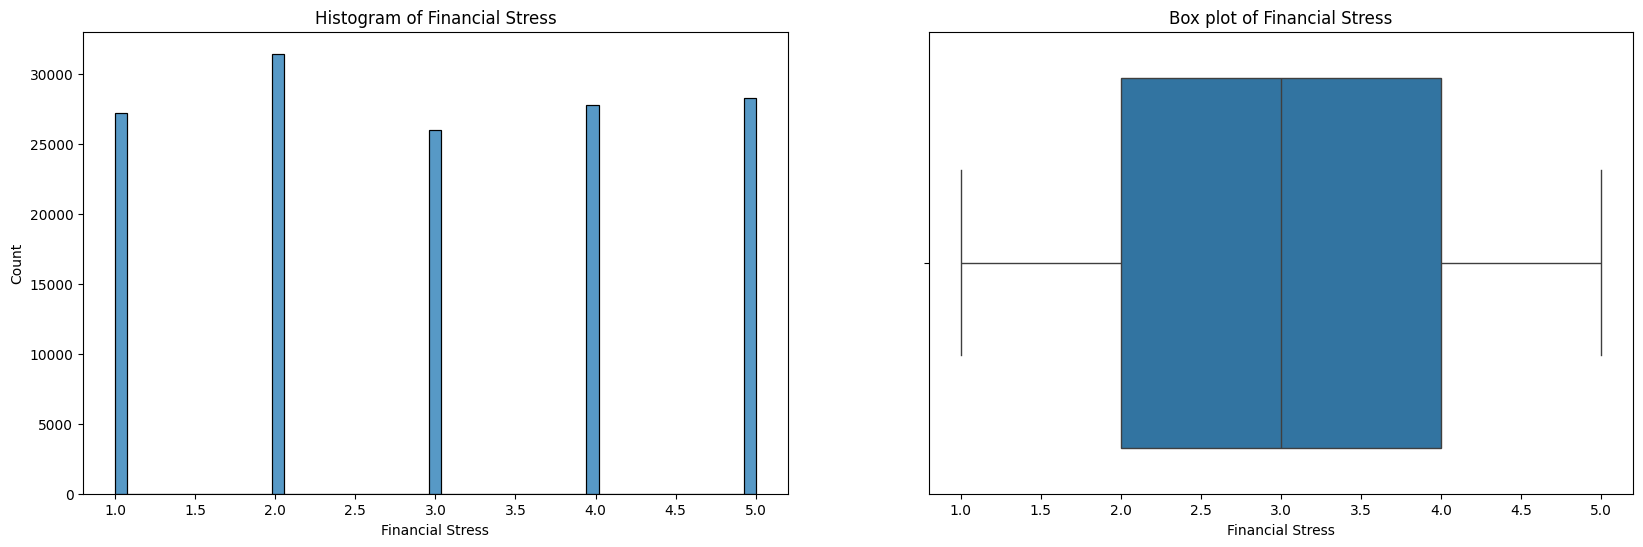

In [39]:
plot_numerical(data, 'Financial Stress')

#### Insights:
- The mean (2.99) and median (3.0) suggest that financial stress is neither predominantly low nor high but falls in the middle for most individuals
- The uniform distribution indicates significant variability, likely due to differences in income, expenses, and financial responsibilities among individuals

### Gender

#### Check missing values

In [52]:
check_missing_values(data, 'Gender')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [53]:
data['Gender'].describe()

count     140700
unique         2
top         Male
freq       77464
Name: Gender, dtype: object

#### Visualizations

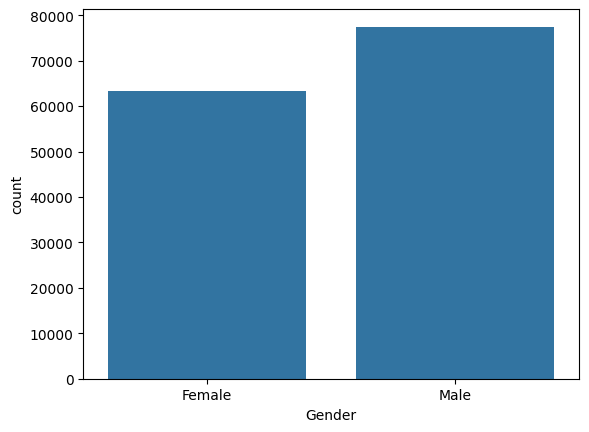

<Figure size 1000x600 with 0 Axes>

In [54]:
plot_categorical(data, 'Gender')

#### Insights:
- The dataset has more males than females
- This imbalance should be accounted for when performing gender-based analysis to avoid biased results

### City

#### Check missing values

In [55]:
check_missing_values(data, 'City')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [56]:
data['City'].describe()

count     140700
unique        98
top       Kalyan
freq        6591
Name: City, dtype: object

#### Visualizations

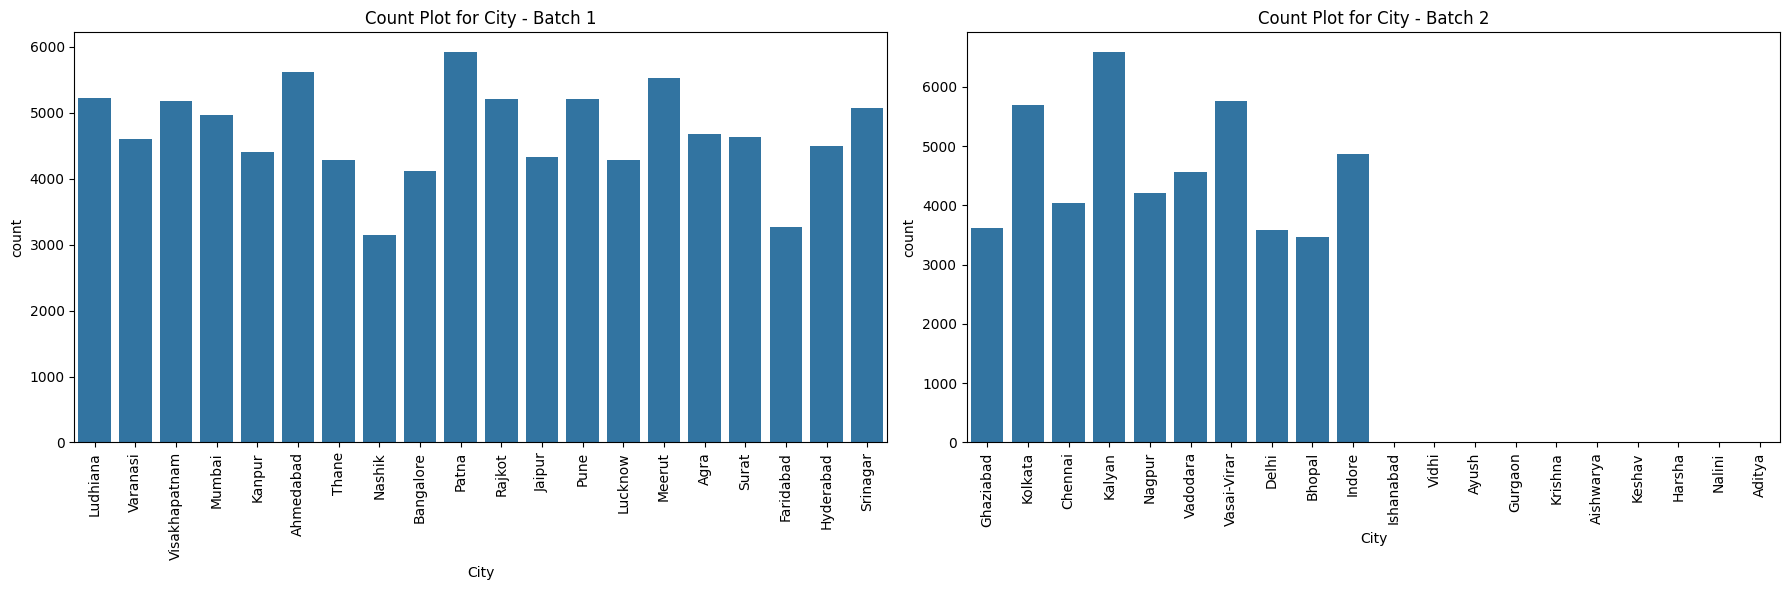

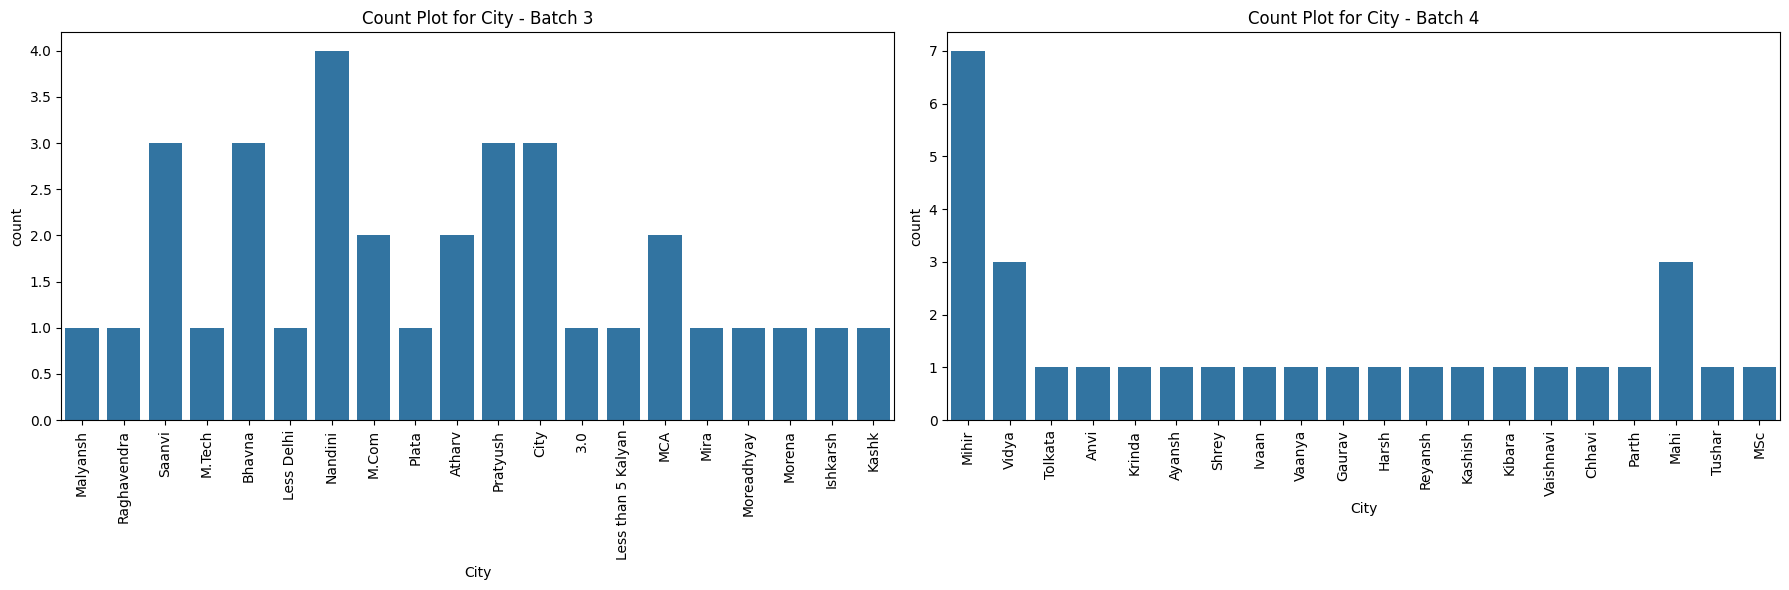

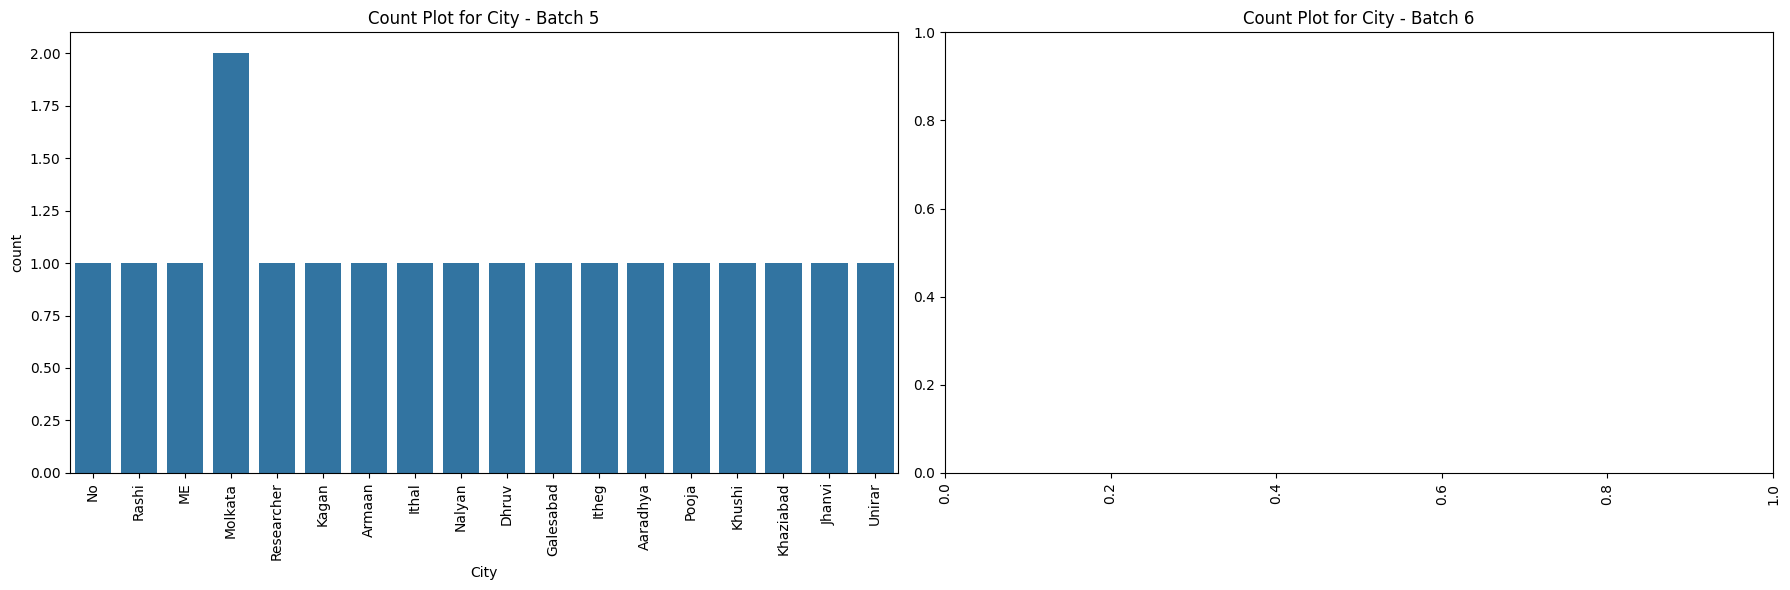

In [57]:
plot_categorical(data, 'City')

#### Insights:
- Certain cities dominate the dataset, such as Kalyan and Patna, while others have only a few observations. This imbalance could affect analyses involving city-specific comparisons

### Working Professional or Student

#### Check missing values

In [58]:
check_missing_values(data, 'Working Professional or Student')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [59]:
data['Working Professional or Student'].describe()

count                   140700
unique                       2
top       Working Professional
freq                    112799
Name: Working Professional or Student, dtype: object

#### Visualizations

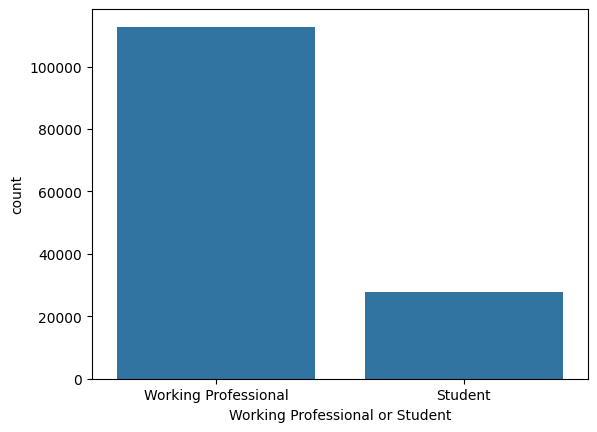

<Figure size 1000x600 with 0 Axes>

In [60]:
plot_categorical(data, 'Working Professional or Student')

#### Insights:
- The dataset is imbalanced, with 80% working professionals and 20% students

### Profession

#### Check missing values

In [61]:
check_missing_values(data, 'Profession')

Missing values count: 36630
Missing values percentage: 26.03%


#### Descriptive Statistics

In [62]:
data['Profession'].describe()

count      104070
unique         64
top       Teacher
freq        24906
Name: Profession, dtype: object

#### Visualizations

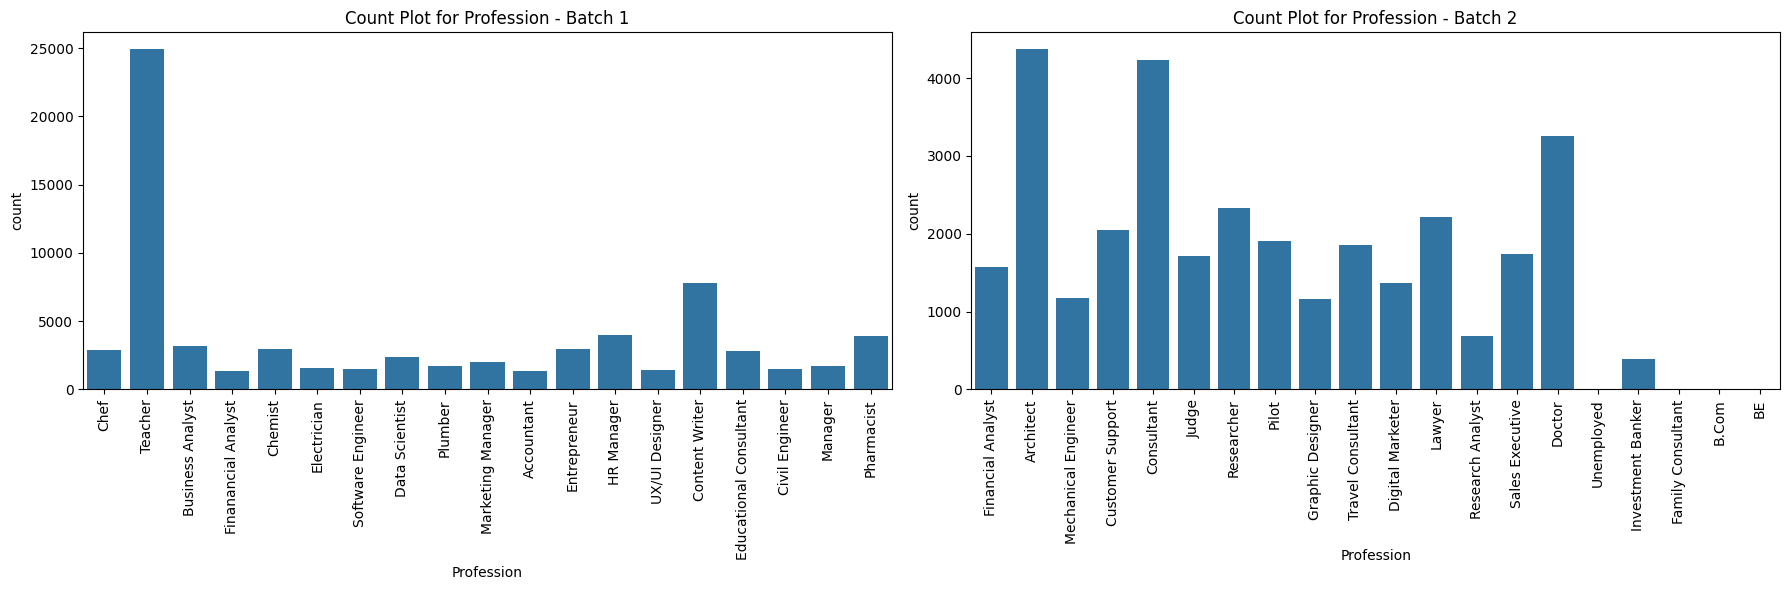

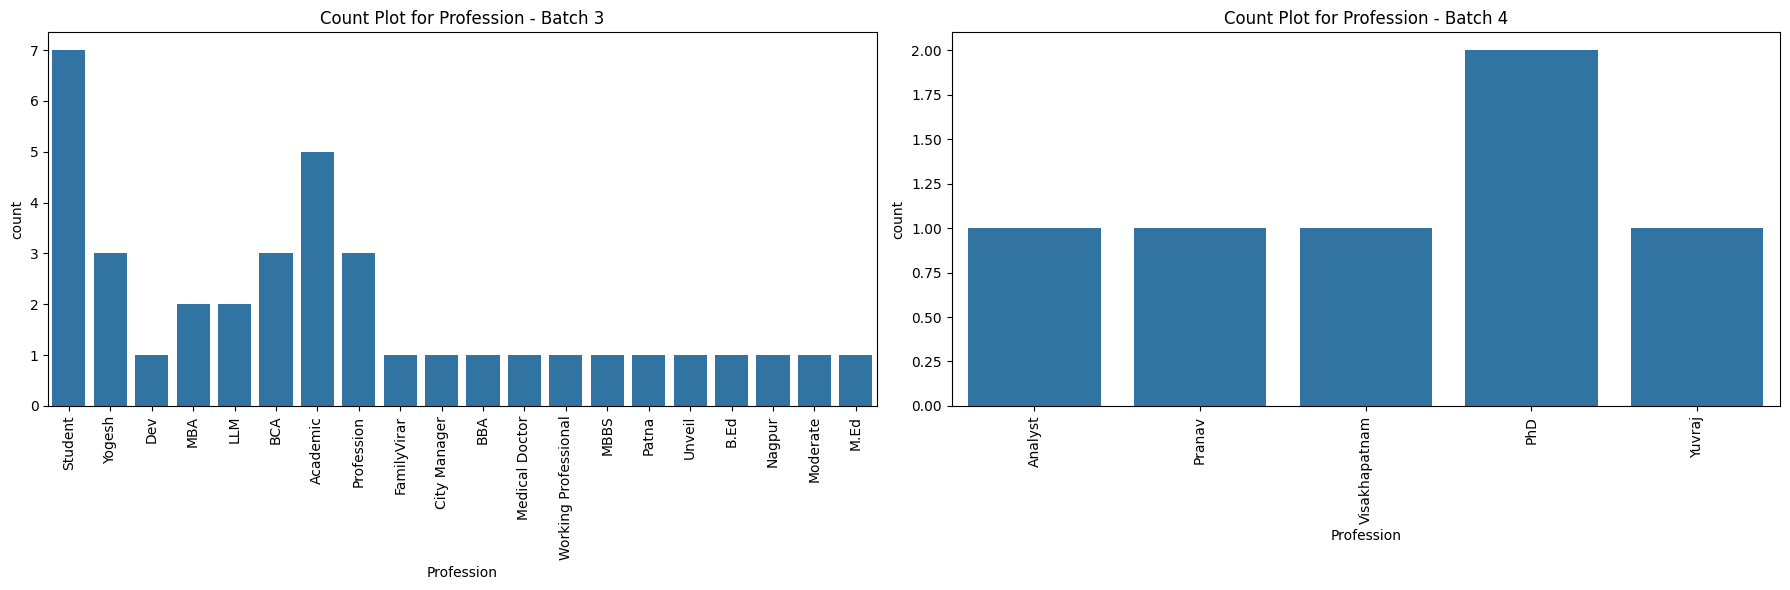

In [64]:
plot_categorical(data, 'Profession')

**Insights:**
- A few professions, such as Teacher and Content Writer, make up a large proportion of the data
- Many other professions are underrepresented, which may affect the reliability of analyses involving these roles
- The 26.03% missing data might correspond to individuals whose professions were not recorded or applicable.

### Sleep Duration

#### Check missing values

In [65]:
check_missing_values(data, 'Sleep Duration')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [66]:
data['Sleep Duration'].describe()

count                140700
unique                   36
top       Less than 5 hours
freq                  38784
Name: Sleep Duration, dtype: object

#### Visualizations

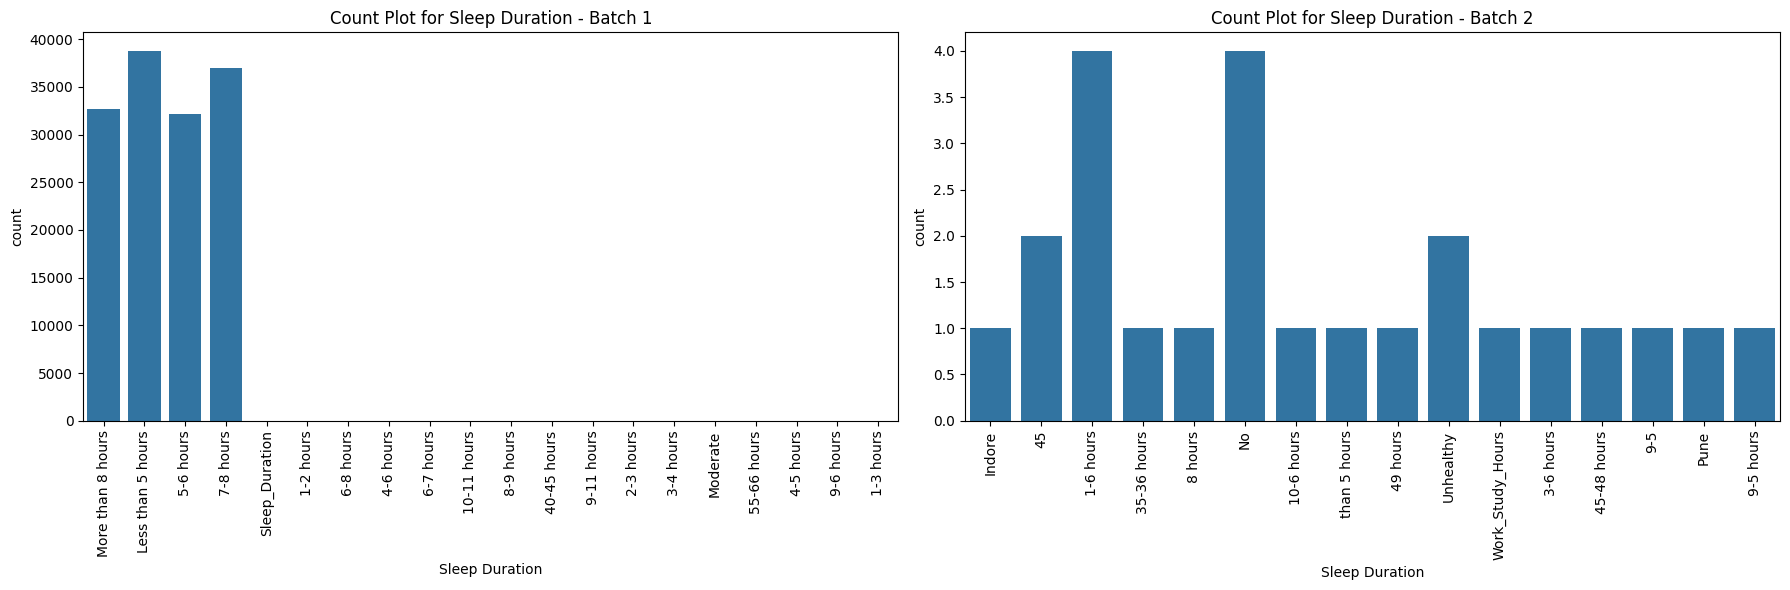

In [67]:
plot_categorical(data, 'Sleep Duration')

#### Insights:
- A significant portion of individuals reports sleeping less than 5 hours or 5-6 hours, suggesting that sleep deprivation may be prevalent in the dataset population

### Dietary Habits

#### Check missing values

In [68]:
check_missing_values(data, 'Dietary Habits')

Missing values count: 4
Missing values percentage: 0.0%


#### Descriptive Statistics

In [69]:
data['Dietary Habits'].describe()

count       140696
unique          23
top       Moderate
freq         49705
Name: Dietary Habits, dtype: object

#### Visualizations

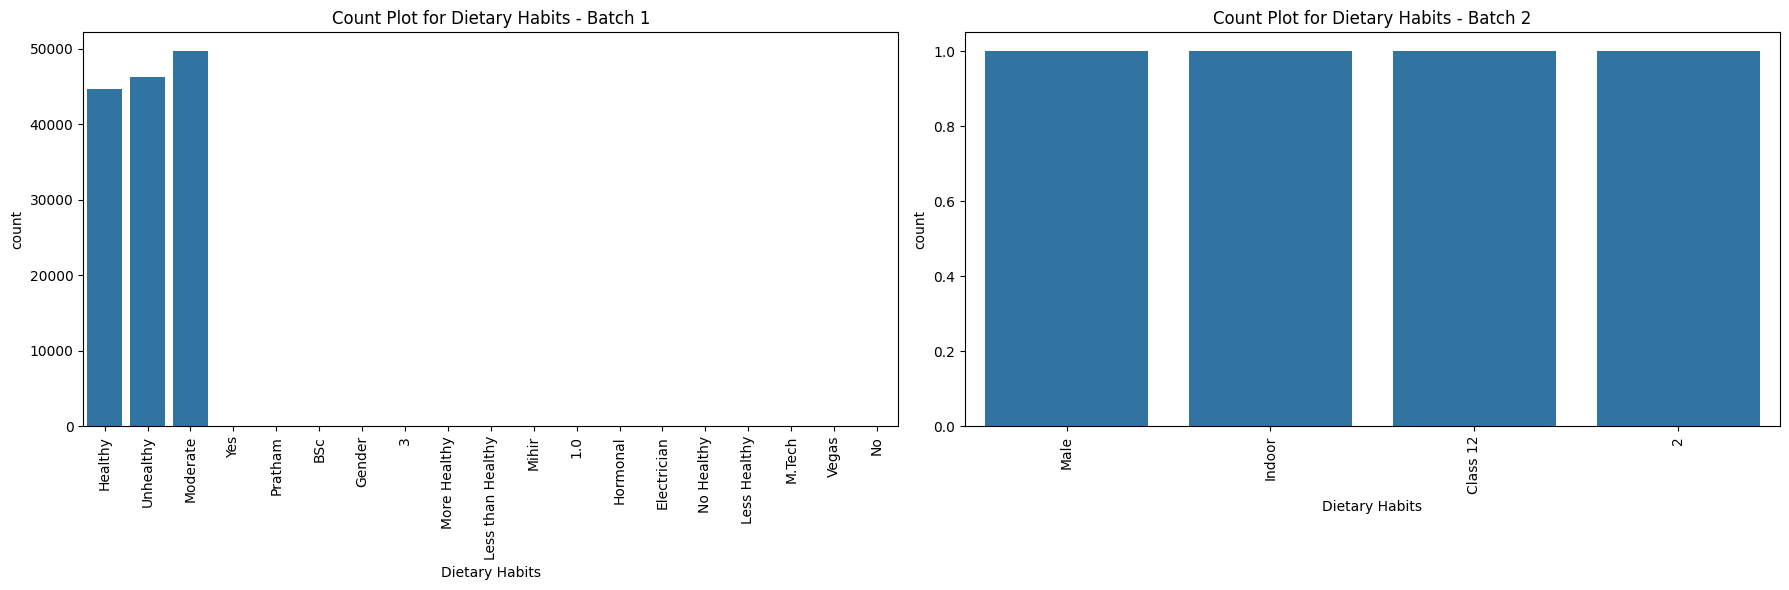

In [70]:
plot_categorical(data, 'Dietary Habits')

#### Insights:
- A significant portion of the population reports having a moderate diet, while smaller groups fall under healthy or unhealthy categories
- Many low-frequency categories could be grouped into another category (e.g., "Unknown") to simplify analysis and focus on meaningful patterns

### Degree

#### Check missing values

In [71]:
check_missing_values(data, 'Degree')

Missing values count: 2
Missing values percentage: 0.0%


#### Descriptive Statistics

In [72]:
data['Degree'].describe()

count       140698
unique         115
top       Class 12
freq         14729
Name: Degree, dtype: object

#### Visualizations

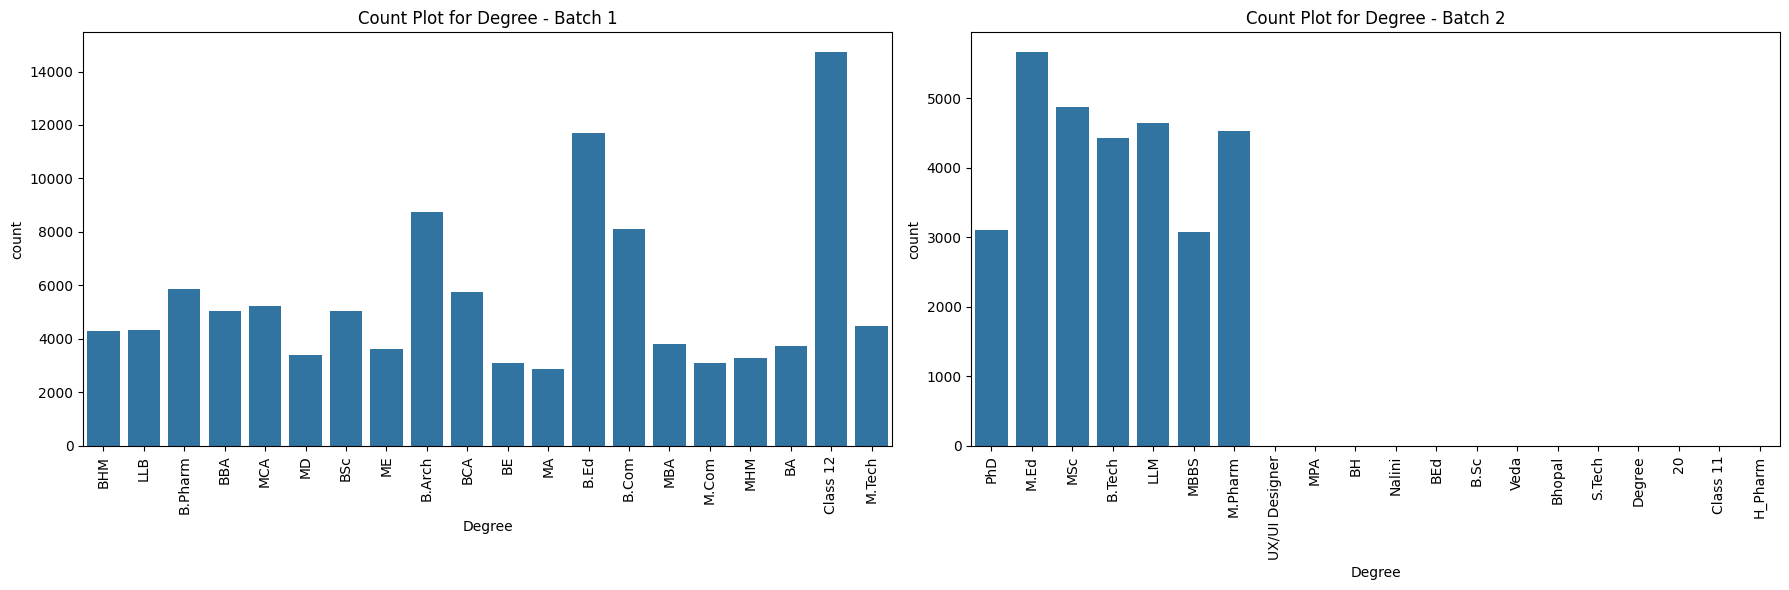

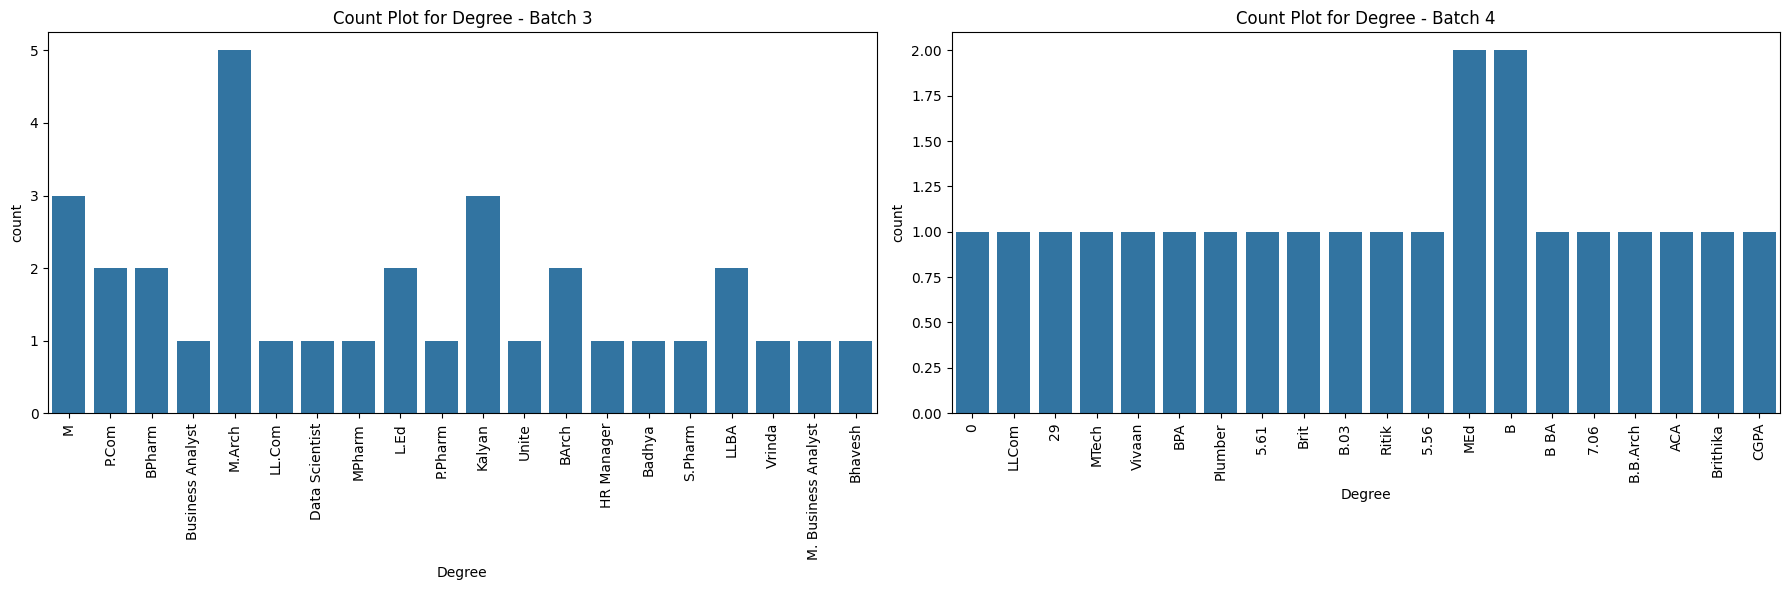

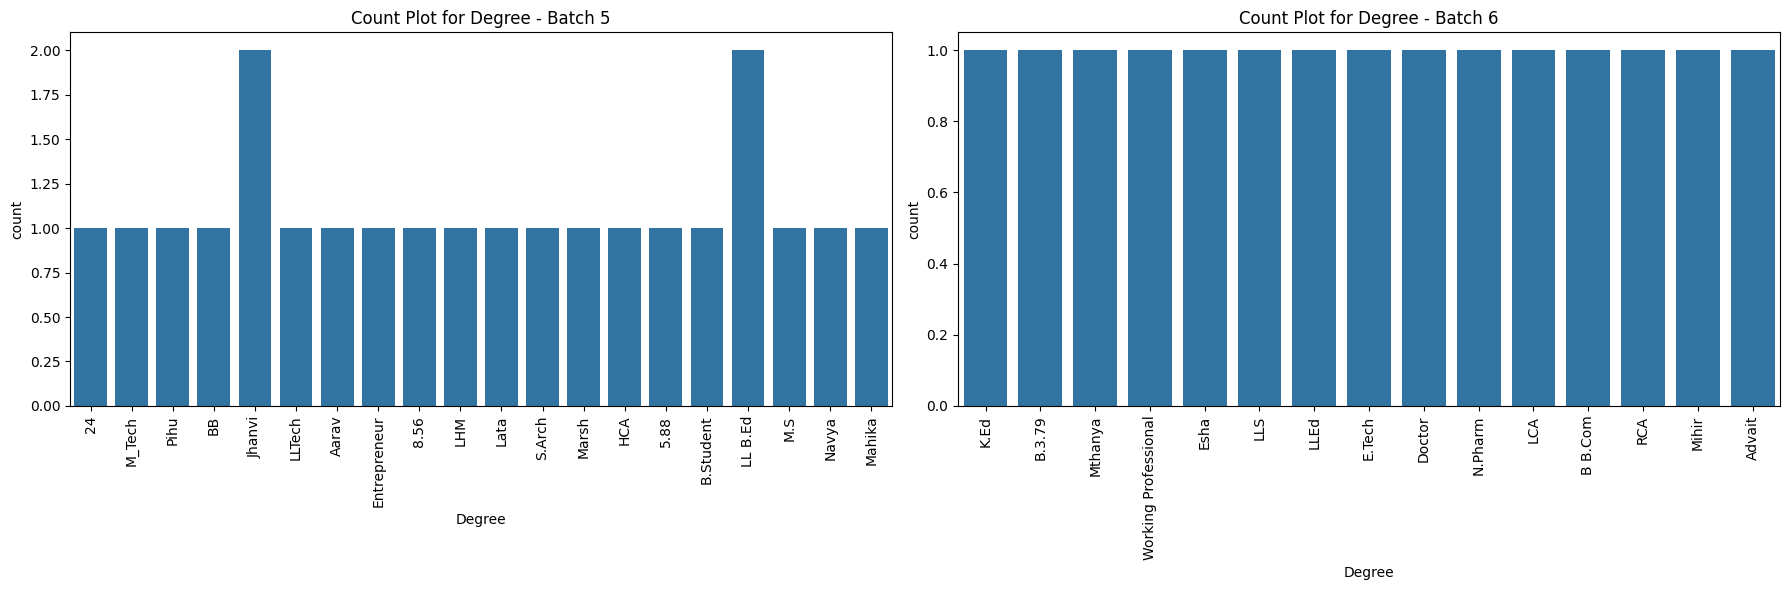

In [73]:
plot_categorical(data, 'Degree')

#### Insights:
- The dataset is dominated by a few common degrees, such as Class 12, B.Ed, and B.Arch, while other degrees have very low representation
- This imbalance might skew analyses unless grouped or filtered
- The dataset includes a wide range of degrees, reflecting a highly diverse population
- The presence of low-frequency degrees (e.g., niche certifications or advanced qualifications) indicates variability in the dataset.

### Had Suicidal Thoughts?

#### Check missing values

In [74]:
check_missing_values(data, 'Had Suicidal Thoughts?')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [75]:
data['Had Suicidal Thoughts?'].describe()

count     140700
unique         2
top           No
freq       71138
Name: Had Suicidal Thoughts?, dtype: object

#### Visualizations

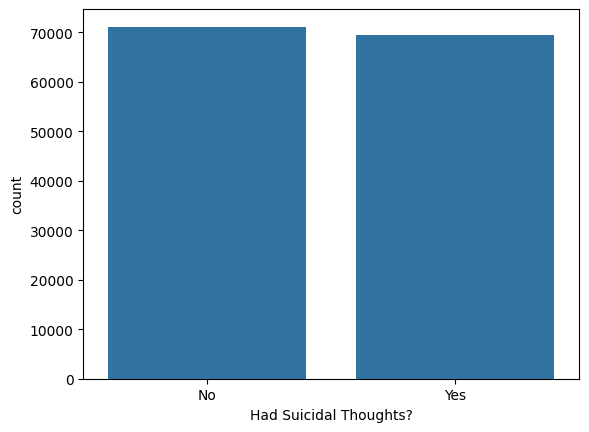

<Figure size 1000x600 with 0 Axes>

In [76]:
plot_categorical(data, 'Had Suicidal Thoughts?')

#### Insights:
- Nearly 49.5% of respondents report having had suicidal thoughts, indicating a significant mental health concern in the dataset population
- The almost equal distribution between "Yes" and "No" responses makes this variable valuable for correlation and modeling, as it provides sufficient representation for both groups

### Family History of Mental Illness

#### Check missing values

In [78]:
check_missing_values(data, 'Family History of Mental Illness')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [80]:
data['Family History of Mental Illness'].describe()

count     140700
unique         2
top           No
freq       70758
Name: Family History of Mental Illness, dtype: object

#### Visualizations

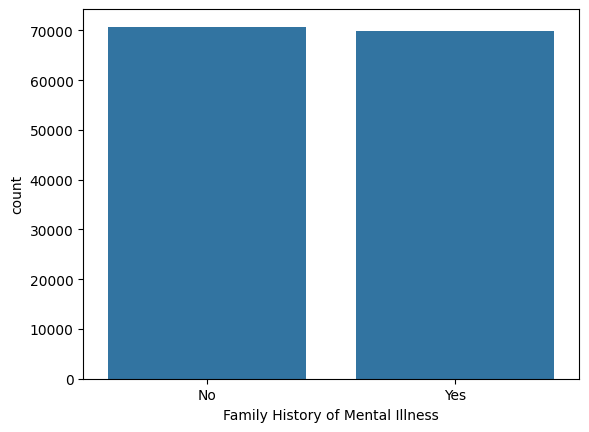

<Figure size 1000x600 with 0 Axes>

In [81]:
plot_categorical(data, 'Family History of Mental Illness')

#### Insights:
- Approximately 49.7% of respondents report a family history of mental illness, indicating a significant proportion of the population may have genetic or environmental predispositions to mental health challenges

### Depression

#### Check missing values

In [82]:
check_missing_values(data, 'Depression')

Missing values count: 0
Missing values percentage: 0.0%


#### Descriptive Statistics

In [83]:
data['Depression'].describe()

count            140700
unique                2
top       Not Depressed
freq             115133
Name: Depression, dtype: object

#### Visualizations

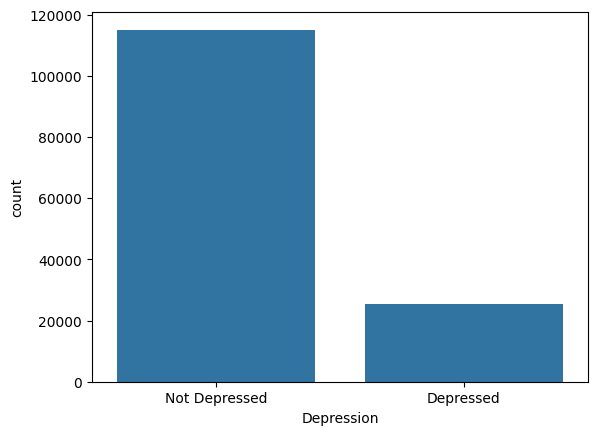

<Figure size 1000x600 with 0 Axes>

In [84]:
plot_categorical(data, 'Depression')

#### Insights:
- Although a majority (81.8%) of respondents are not classified as depressed, the 18.2% depression rate indicates a notable prevalence in the dataset population
- This highlights the importance of investigating factors contributing to depression and potential interventions